In [ ]:
import tensorflow as tf

In [ ]:
import keras

In [ ]:
print(tf.__version__)

2.15.0


In [ ]:
print(keras.__version__)

2.15.0


In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"manavbillimoria","key":"ca35686d162b044722c5340d352da96f"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets list

ref                                                         title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rabieelkharoua/students-performance-dataset                 📚 Students Performance Dataset 📚                     66KB  2024-06-12 23:09:20          19832        436  1.0              
nelgiriyewithana/most-streamed-spotify-songs-2024           Most Streamed Spotify Songs 2024                    496KB  2024-06-15 18:50:51          14805        316  1.0              
ihelon/coffee-sales                                         Coffee Sales                                         11KB  2024-07-18 10:06:43           5892         98  1.0              
abdullahshf/neet-ug-2024-results-all-india                  NEET UG 2024 Results

In [ ]:
!kaggle datasets download -d jayanthchukka/diabetes-dataset-for-beginers --force


Dataset URL: https://www.kaggle.com/datasets/jayanthchukka/diabetes-dataset-for-beginers
License(s): unknown
  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 13.3MB/s]


In [ ]:
!unzip diabetes-dataset-for-beginers.zip -d diabetes_dataset

Archive:  diabetes-dataset-for-beginers.zip
  inflating: diabetes_dataset/diabetes.csv  


In [ ]:
!pip install opendatasets

In [ ]:
!pip install pandas

In [ ]:
import opendatasets as od
import pandas as pd

In [ ]:
od.download("https://www.kaggle.com/datasets/prathamtripathi/drug-classification")

Dataset URL: https://www.kaggle.com/datasets/prathamtripathi/drug-classification


100%|██████████| 1.68k/1.68k [00:00<00:00, 1.82MB/s]

In [ ]:
data=pd.read_csv("drug-classification/drug200.csv")

In [ ]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Sex']=le.fit_transform(data['Sex'])
data['BP']=le.fit_transform(data['BP'])
data['Cholesterol']=le.fit_transform(data['Cholesterol'])
data['Drug']=le.fit_transform(data['Drug'])

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers,models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [ ]:
data["Drug"].value_counts()

Drug
0    91
4    54
1    23
3    16
2    16
Name: count, dtype: int64

In [ ]:
x=data.drop(columns='Drug',axis=1)
y=data['Drug']

In [ ]:
obj=StandardScaler()
x_=obj.fit_transform(x)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
y_reshaped = y.values.reshape(-1, 1)

y_encoded = encoder.fit_transform(y_reshaped).toarray()

# xtrain,xtest,ytrain_encoded,ytest_encoded=train_test_split(x_,y_encoded,test_size=0.1,random_state=2)
# xtrain,xtest,ytrain_encoded,ytest_encoded=train_test_split(x_,y_encoded,test_size=0.2,random_state=2)
xtrain,xtest,ytrain_encoded,ytest_encoded=train_test_split(x_,y_encoded,test_size=0.3,random_state=2)

In [ ]:
model = models.Sequential()
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(75, activation='relu'))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(25, activation='relu'))
model.add(layers.Dense(12, activation='relu'))
model.add(layers.Dense(6, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))

In [ ]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [ ]:
history = model.fit(xtrain, ytrain_encoded, epochs=50, validation_data=(xtest, ytest_encoded))

Epoch 1/50
5/5 [==============================] - 2s 62ms/step - loss: 1.5838 - accuracy: 0.4929 - val_loss: 1.5633 - val_accuracy: 0.4833
Epoch 2/50
5/5 [==============================] - 0s 15ms/step - loss: 1.5436 - accuracy: 0.5429 - val_loss: 1.5297 - val_accuracy: 0.5167
Epoch 3/50
5/5 [==============================] - 0s 11ms/step - loss: 1.4954 - accuracy: 0.6000 - val_loss: 1.4801 - val_accuracy: 0.5500
Epoch 4/50
5/5 [==============================] - 0s 15ms/step - loss: 1.4291 - accuracy: 0.6214 - val_loss: 1.4200 - val_accuracy: 0.5667
Epoch 5/50
5/5 [==============================] - 0s 12ms/step - loss: 1.3445 - accuracy: 0.6286 - val_loss: 1.3506 - val_accuracy: 0.5500
Epoch 6/50
5/5 [==============================] - 0s 15ms/step - loss: 1.2394 - accuracy: 0.6643 - val_loss: 1.2740 - val_accuracy: 0.5500
Epoch 7/50
5/5 [==============================] - 0s 14ms/step - loss: 1.1287 - accuracy: 0.6714 - val_loss: 1.1858 - val_accuracy: 0.5833
Epoch 8/50
5/5 [===========

In [ ]:
result = model.evaluate(xtest,ytest_encoded)

2/2 [==============================] - 0s 7ms/step - loss: 0.3762 - accuracy: 0.7833


In [ ]:
import matplotlib.pyplot as plt


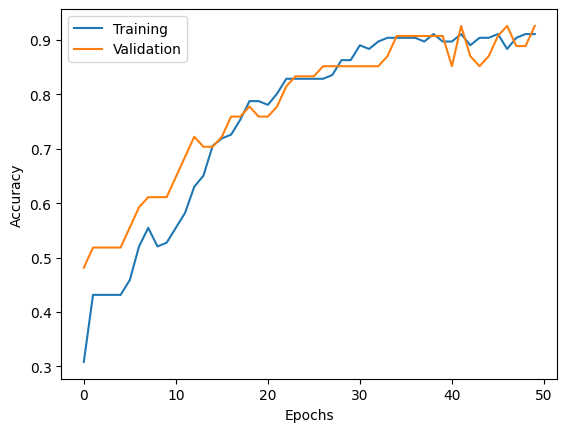

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])
plt.show()
